In [1]:
using PlotRecipes
pyplot(alpha=0.5, size=(800,400))

Plots.PyPlotBackend()

In [2]:
# make a list of a type T and it's supertypes
T = Integer
sups = [T]
sup = T
while sup != Any
    sup = supertype(sup)
    unshift!(sups,sup)
end
sups

4-element Array{DataType,1}:
 Any    
 Number 
 Real   
 Integer

In [17]:
# recursively build a graph of subtypes of T
n = length(sups)
nodes, source, destiny = copy(sups), collect(1:n-1), collect(2:n)
function add_subs!(T, supidx)
    for sub in subtypes(T)
        push!(nodes, sub)
        subidx = length(nodes)
        push!(source, supidx)
        push!(destiny, subidx)
        add_subs!(sub, subidx)
    end
end
add_subs!(T, n)
names = map(string, nodes);


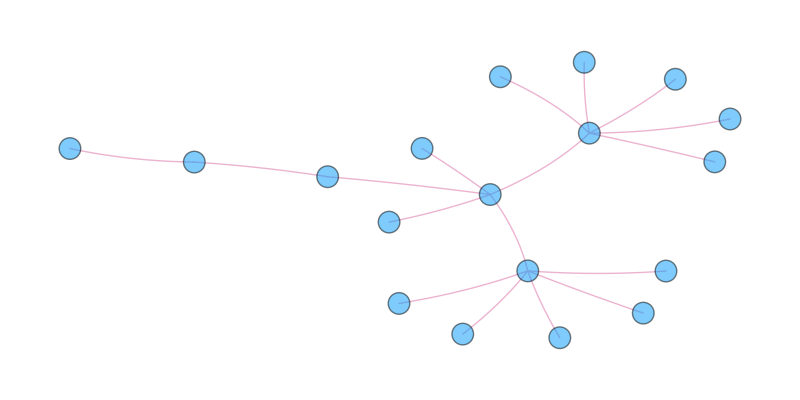

In [18]:
graphplot(source, destiny)


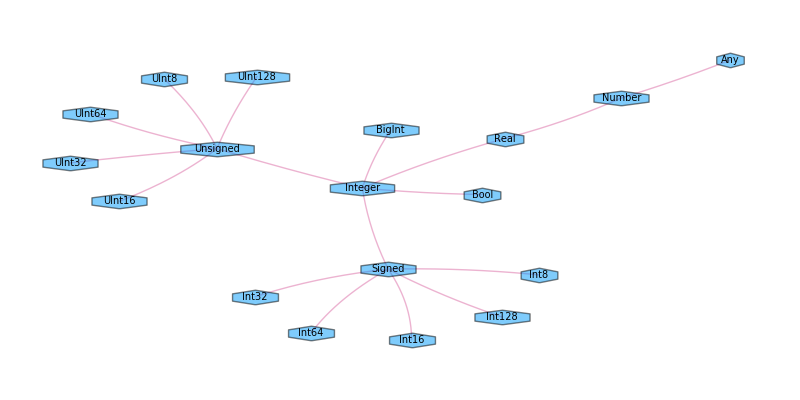

In [8]:
# lets see it.  we use the graphplot "user recipe" from the PlotRecipes package
graphplot(source, destiny, names=names)


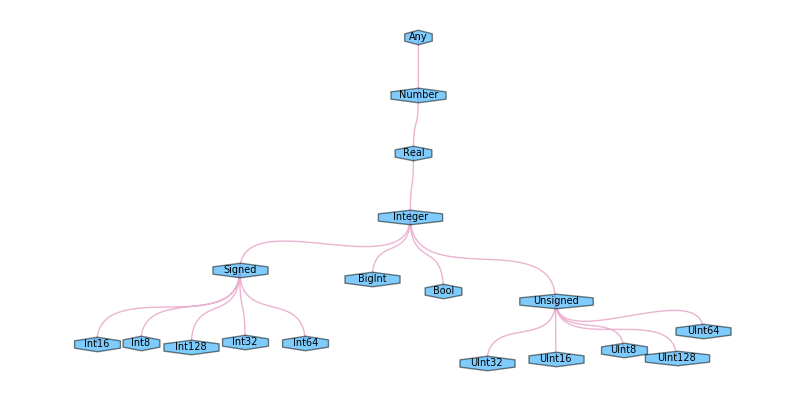

In [11]:
# use a different layout method
graphplot(source, destiny, names=names, method=:tree)


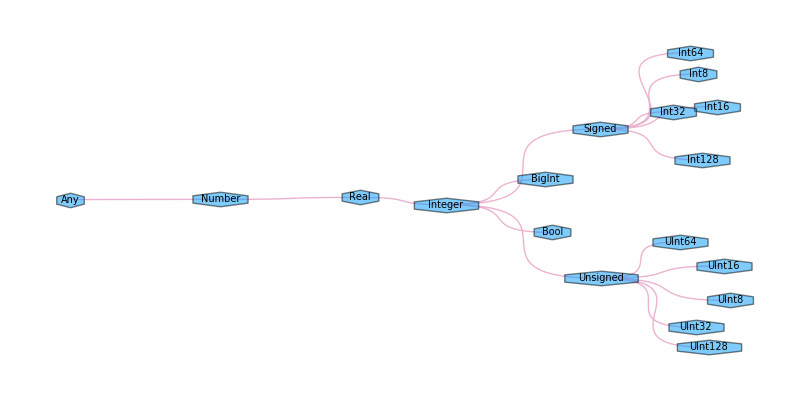

In [13]:
# change the direction
graphplot(source, destiny, names=names, method=:tree, root=:left)


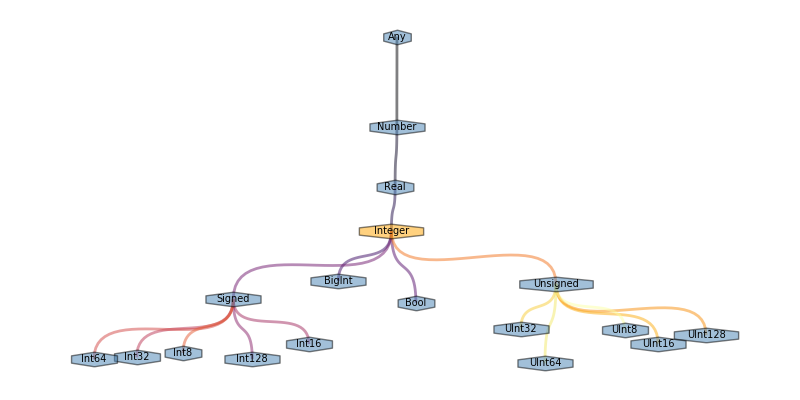

In [15]:
# add some color
weights = linspace(1,2,length(source))
graphplot(source, destiny, weights,
    names = names, method = :tree,
    l = (2, cgrad()),  # apply the default color gradient to the line (line_z values taken from edge weights)
    m = [node==T ? :orange : :steelblue for node in nodes]     # node colors
)

In [19]:
# ignore this:
png("/tmp/tmp")